In [17]:
!pip install keras.utils
!pip install np_utils

In [18]:
import cv2,os
import tensorflow as tf
data_path='/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-I'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)
classes=["3Moderate", "1Doubtful", "0Normal", "2Mild", "4Severe"]

{'3Moderate': 0, '1Doubtful': 1, '0Normal': 2, '2Mild': 3, '4Severe': 4}
['3Moderate', '1Doubtful', '0Normal', '2Mild', '4Severe']
[0, 1, 2, 3, 4]


In [19]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [20]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from tensorflow.keras.utils import to_categorical
new_label=tf.keras.utils.to_categorical(label)
print(new_label)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))    #input is to output 128 filters to the output matrix 3*3
model.add(Activation('relu'))         # increasing the linearity ie to put color in non negitive integer value to pixel
model.add(MaxPooling2D(pool_size=(2,2)))     # Max pooling layer will go through the matrix by computing the max of each 2×2 pool with a jump of 2
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(32,activation='relu'))

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

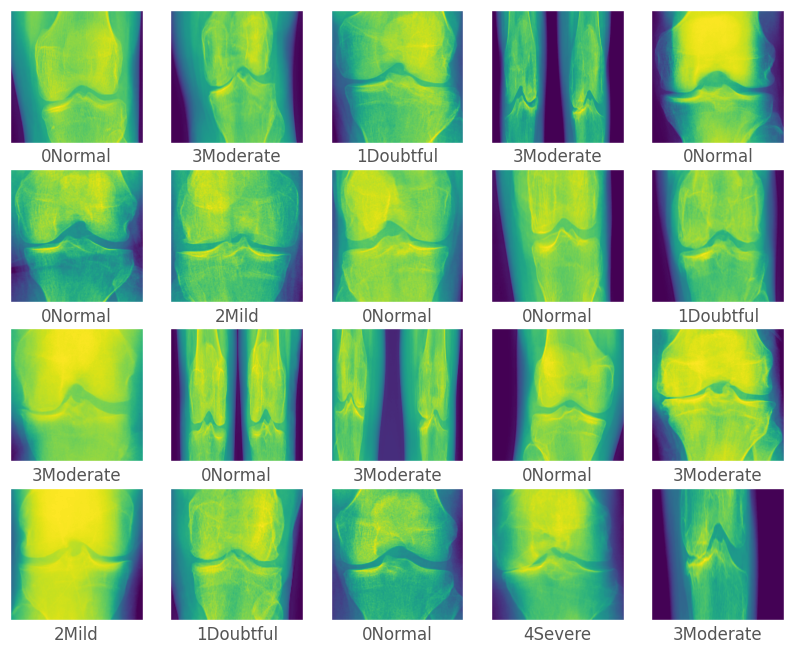

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [24]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
81/81 [==============================] - 18s 170ms/step - loss: 1.5238 - accuracy: 0.3267 - val_loss: 1.5127 - val_accuracy: 0.3240
Epoch 2/50
81/81 [==============================] - 12s 144ms/step - loss: 1.5091 - accuracy: 0.3423 - val_loss: 1.5003 - val_accuracy: 0.3474
Epoch 3/50
81/81 [==============================] - 10s 128ms/step - loss: 1.4837 - accuracy: 0.3501 - val_loss: 1.4991 - val_accuracy: 0.3349
Epoch 4/50
81/81 [==============================] - 10s 127ms/step - loss: 1.4808 - accuracy: 0.3520 - val_loss: 1.4819 - val_accuracy: 0.3505
Epoch 5/50
81/81 [==============================] - 10s 126ms/step - loss: 1.4592 - accuracy: 0.3586 - val_loss: 1.4677 - val_accuracy: 0.3458
Epoch 6/50
81/81 [==============================] - 10s 126ms/step - loss: 1.4393 - accuracy: 0.3684 - val_loss: 1.4603 - val_accuracy: 0.3474
Epoch 7/50
81/81 [==============================] - 10s 125ms/step - loss: 1.4425 - accuracy: 0.3692 - val_loss: 1.4566 - val_accuracy: 0.3676

In [25]:
path = '/content/gdrive/My Drive/knee'
model.save('model.h5',path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


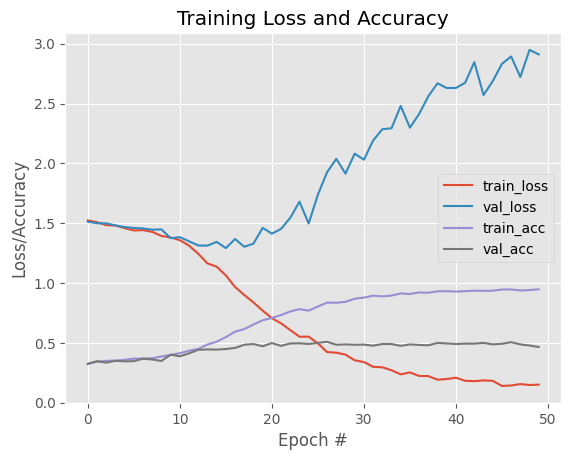

In [26]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 50 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N),history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [27]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 2.454589605331421 %
test accuracy: 0.5434173941612244 %


12/12 [==============================] - 0s 29ms/step


<Figure size 640x480 with 0 Axes>

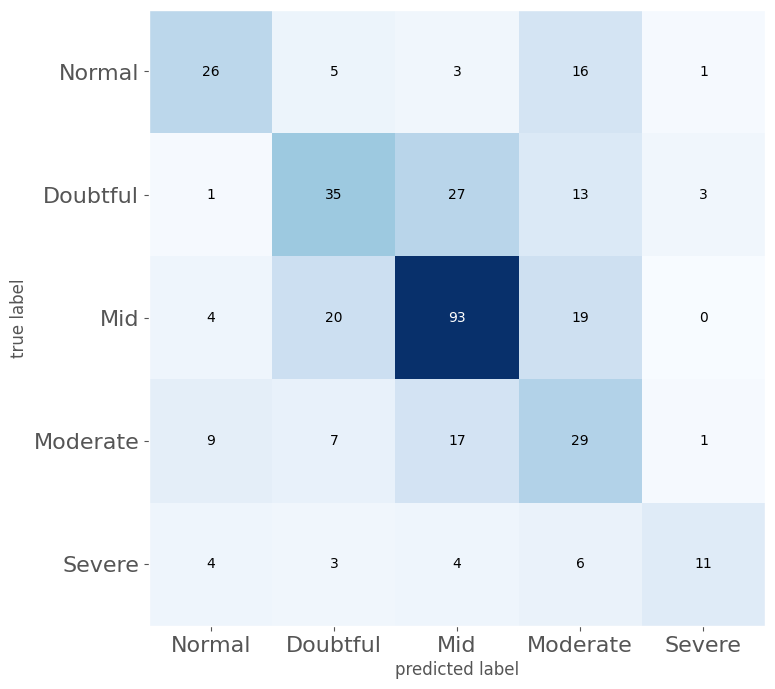

In [28]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

In [29]:

import tensorflow as tf
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     1280      
                                                                 
 activation_4 (Activation)   (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_5 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     1280      
                                                                 
 activation_4 (Activation)   (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_5 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [31]:
from keras.models import load_model
import keras.utils as image
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
#dic = {0 : 'Normal', 1 : 'Doubtful', 2 : 'Mild', 3 : 'Moderate', 4 : 'Severe'}
classes=["3Moderate", "1Doubtful", "0Normal", "2Mild", "4Severe"]

#Image Size
img_size=256
model = load_model('model.h5')

import numpy as np
import PIL
img_data = PIL.Image.open(img_path )
img_arr = np.array(img_data)

model.make_predict_function()
img_path = '/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/2Mild/MildG2 (100).png'
img=cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
i = image.img_to_array(resized)/255.0
i = i.reshape(1,img_size,img_size,1)
predictions = (model.predict(i) > 0.5).astype("int32")
print(predictions)

1/1 [==============================] - 0s 88ms/step
[[0 0 0 1 0]]


In [32]:
x_val='/content/drive/MyDrive/knee/val'
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

AttributeError: ignored

In [ ]:
import tensorflow as tf
img_height = 180
img_width = 180
sunflower_url = '/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/2Mild/MildG2 (1).png'
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
y_train.shape

In [ ]:
from keras import layers
from tensorflow.keras.layers import Dense, Dropout,GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.applications import densenet, ResNet50, VGG19
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(x_train, y_train,0)

In [ ]:
import cv2
img=cv2.imread('/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/2Mild/MildG2 (1).png')
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/2Mild/MildG2 (1).png')
,path = Path("."))
print(learn.predict(img)[0])
plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

resize =tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
resize

In [ ]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=img_size,
        class_mode='sparse',
        batch_size=batch_size,
        shuffle=True,
        seed=123,
        subset='training',
        horizontal_flip=True,
        rotation_range=15,
        zoom_range=0.2,
        shear_range=0.3,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        samplewise_std_normalization=True
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=img_size,
        class_mode='sparse',
        batch_size=batch_size,
        shuffle=False,
        seed=123,
        subset='validation',
        horizontal_flip=True,
        rotation_range=15,
        zoom_range=0.2,
        shear_range=0.3,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        samplewise_std_normalization=True
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=img_size,
        class_mode='sparse',
        batch_size=batch_size,
        shuffle=False,
        samplewise_std_normalization=True
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
epochs = 10
img_height = 224
img_width = 224
batch_size = 32
dropout_rate = 0.3
dense_node = 128

img_size = (img_height, img_width)
img_shape = (img_height, img_width, 3)

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns
image_dir = Path('../input/knee-osteoarthritis-dataset')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

In [ ]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = batch_size,
    epochs=epochs,
    callbacks=[es]
)

In [ ]:
results = model.evaluate(test_images, verbose=1)

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the test set: {:.2f}%".format(results[1] * 100))

In [ ]:
sunflower_url = "/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/2Mild/MildG2 (1).png"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)